In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf
from PIL import Image
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2gray
from skimage.transform import resize
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
df_img_list = pd.read_csv('train_image_level.csv')

In [3]:
df_img_list.head(2)

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed


In [4]:
df_img_list['img_path'] = 'train/' + df_img_list['id'].replace('_image', '', regex=True) + '.jpg'
df_img_list['bin_label'] = df_img_list['boxes'].notna().astype(int)

In [5]:
df_img_list.head(2)

,id,boxes,label,StudyInstanceUID,img_path,bin_label
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,train/000a312787f2.jpg,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,train/000c3a3f293f.jpg,0


In [6]:
df = df_img_list[['id', 'img_path', 'bin_label']].copy()

In [7]:
df

,id,img_path,bin_label
0,000a312787f2_image,train/000a312787f2.jpg,1
1,000c3a3f293f_image,train/000c3a3f293f.jpg,0
2,0012ff7358bc_image,train/0012ff7358bc.jpg,1
3,001398f4ff4f_image,train/001398f4ff4f.jpg,1
4,001bd15d1891_image,train/001bd15d1891.jpg,1
...,...,...,...
6329,ffcc6edd9445_image,train/ffcc6edd9445.jpg,0
6330,ffd91a2c4ca0_image,train/ffd91a2c4ca0.jpg,0
6331,ffd9b6cf2961_image,train/ffd9b6cf2961.jpg,1
6332,ffdc682f7680_image,train/ffdc682f7680.jpg,1


In [8]:
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from scipy import stats

mean_list = []
min_list = []
q1_list = []
median_list = []
q3_list = []
max_list = []
mode_list = []
var_list = []
std_list = []
cv_list = []
iqr_list = []

for path in tqdm(df['img_path']):
    img = Image.open(path).convert('L')
    arr = np.array(img).flatten().astype(np.float32)  

    mean = arr.mean()
    std = arr.std()
    var = arr.var()
    q1 = np.percentile(arr, 25)
    median = np.median(arr)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    min_val = arr.min()
    max_val = arr.max()
    mode = stats.mode(arr, keepdims=False).mode
    cv = std / mean if mean != 0 else 0

    mean_list.append(mean)
    min_list.append(min_val)
    q1_list.append(q1)
    median_list.append(median)
    q3_list.append(q3)
    max_list.append(max_val)
    mode_list.append(mode)
    var_list.append(var)
    std_list.append(std)
    cv_list.append(cv)
    iqr_list.append(iqr)

df['Mean'] = mean_list
df['Min'] = min_list
df['Q1'] = q1_list
df['Median'] = median_list
df['Q3'] = q3_list
df['Max'] = max_list
df['Mode'] = mode_list
df['Var'] = var_list
df['SD'] = std_list
df['CV'] = cv_list
df['IQR'] = iqr_list


100%|██████████| 6334/6334 [00:15<00:00, 417.21it/s]


In [9]:
df

,id,img_path,bin_label,Mean,Min,Q1,Median,Q3,Max,Mode,Var,SD,CV,IQR
0,000a312787f2_image,train/000a312787f2.jpg,1,128.671219,0.0,87.0,135.0,192.0,255.0,2.0,4594.478027,67.782578,0.526789,105.0
1,000c3a3f293f_image,train/000c3a3f293f.jpg,0,161.156876,0.0,119.0,173.0,199.0,250.0,186.0,2483.795410,49.837692,0.309250,80.0
2,0012ff7358bc_image,train/0012ff7358bc.jpg,1,106.971786,0.0,72.0,106.0,148.0,255.0,106.0,2607.826660,51.066883,0.477386,76.0
3,001398f4ff4f_image,train/001398f4ff4f.jpg,1,120.719391,0.0,38.0,127.0,195.0,255.0,0.0,7195.341309,84.825356,0.702666,157.0
4,001bd15d1891_image,train/001bd15d1891.jpg,1,100.022202,0.0,86.0,106.0,121.0,146.0,107.0,849.666138,29.149033,0.291426,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,train/ffcc6edd9445.jpg,0,132.930649,0.0,79.0,133.0,196.0,247.0,0.0,4435.089355,66.596466,0.500987,117.0
6330,ffd91a2c4ca0_image,train/ffd91a2c4ca0.jpg,0,105.768494,0.0,92.0,107.0,121.0,149.0,110.0,510.966858,22.604576,0.213717,29.0
6331,ffd9b6cf2961_image,train/ffd9b6cf2961.jpg,1,111.360992,0.0,61.0,119.0,160.0,250.0,0.0,3814.473633,61.761425,0.554606,99.0
6332,ffdc682f7680_image,train/ffdc682f7680.jpg,1,146.238953,0.0,121.0,171.0,186.0,255.0,0.0,3451.235840,58.747219,0.401721,65.0


In [10]:
def process_image(img_path, img_size = (256, 256)):
    try:
        img = imread(img_path)
        if img.ndim == 3:
            if img.shape[2] == 4:
                img = rgba2rgb(img)  
            img = rgb2gray(img)    
        elif img.ndim != 2:
            return None 

        img_resized = resize(img, img_size, anti_aliasing=True)
        return img_resized.flatten()
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None


In [11]:
df["data"] = df["img_path"].apply(lambda p: process_image(p))

In [12]:
df["data"]

0       [0.7686274509803921, 0.7607843137254902, 0.752...
1       [0.37254901960784315, 0.42745098039215684, 0.4...
2       [0.00392156862745098, 0.00392156862745098, 0.0...
3       [0.28627450980392155, 0.03137254901960784, 0.0...
4       [0.0784313725490196, 0.08235294117647059, 0.08...
                              ...                        
6329    [0.0, 0.00392156862745098, 0.03529411764705882...
6330    [0.11372549019607843, 0.1411764705882353, 0.16...
6331    [0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098,...
6332    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6333    [0.023529411764705882, 0.0, 0.0274509803921568...
Name: data, Length: 6334, dtype: object

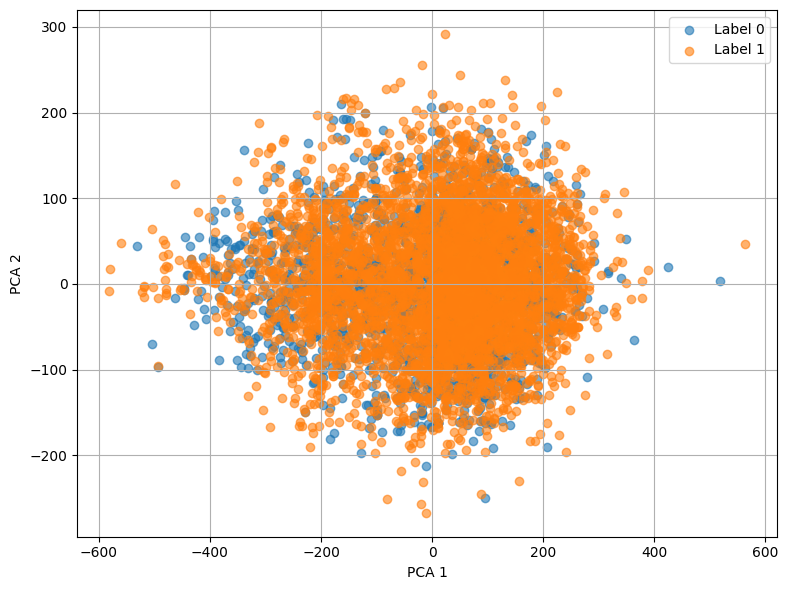

In [13]:
y = df['bin_label'].values  

X_scaled = StandardScaler().fit_transform(np.vstack(df['data'].values)  )

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    idx = y == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Label {label}', alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


ari = adjusted_rand_score(df['bin_label'], cluster_labels)
print(f"{ari:.4f}")

0.0036


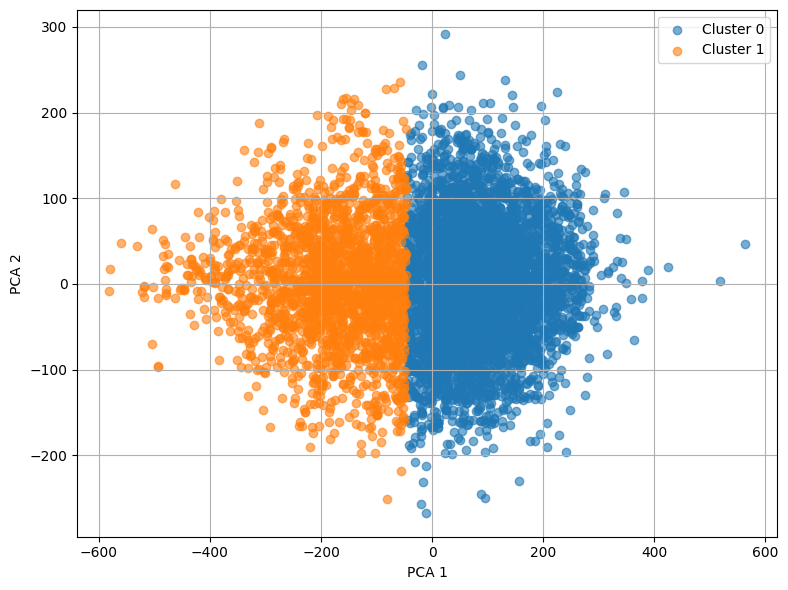

In [15]:
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    idx = cluster_labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Cluster {label}', alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral.fit_predict(X_scaled)

df['spectral_cluster'] = cluster_labels
ari = adjusted_rand_score(df['bin_label'], cluster_labels)
print(f"{ari:.4f}")

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


0.0002


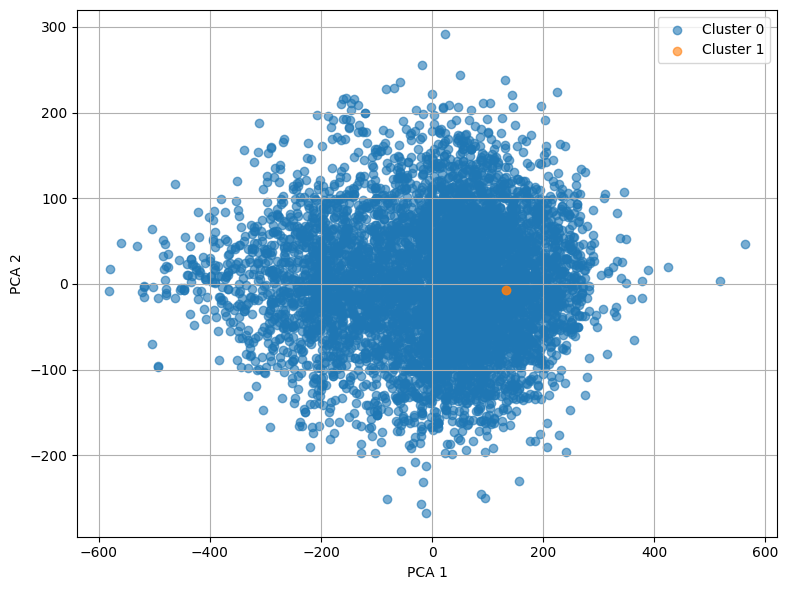

In [17]:
plt.figure(figsize=(8, 6))
for label in np.unique(cluster_labels):
    idx = cluster_labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Cluster {label}', alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled) 

df['gmm_cluster'] = gmm_labels
ari = adjusted_rand_score(df['bin_label'], gmm_labels)
print(f"{ari:.4f}")

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(gmm_labels):
    idx = gmm_labels == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'GMM Cluster {label}', alpha=0.6)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()